In [60]:
import pandas
#create a data  dataframe
data = pandas.read_csv('bank.csv') 
data

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Property_Area,Loan_Status
0,LP001002,Male,No,Graduate,No,5849,0.0,NaN,Urban,Y
1,LP001003,Male,Yes,Graduate,No,4583,1508.0,128.0,Rural,N
2,LP001005,Male,Yes,Graduate,Yes,3000,0.0,66.0,Urban,Y
3,LP001006,Male,Yes,Not Graduate,No,2583,2358.0,120.0,Urban,Y
4,LP001008,Male,No,Graduate,No,6000,0.0,141.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,Graduate,No,2900,0.0,71.0,Rural,Y
610,LP002979,Male,Yes,Graduate,No,4106,0.0,40.0,Rural,Y
611,LP002983,Male,Yes,Graduate,No,8072,240.0,253.0,Urban,Y
612,LP002984,Male,Yes,Graduate,No,7583,0.0,187.0,Urban,Y


In [61]:
data[['Married','Gender','ApplicantIncome']]

,Married,Gender,ApplicantIncome
0,No,Male,5849
1,Yes,Male,4583
2,Yes,Male,3000
3,Yes,Male,2583
4,No,Male,6000
...,...,...,...
609,No,Female,2900
610,Yes,Male,4106
611,Yes,Male,8072
612,Yes,Male,7583


In [62]:
#check empty cells
data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Property_Area         0
Loan_Status           0
dtype: int64

In [63]:
#fill self-employed column
data['Self_Employed'].fillna('Unknown', inplace=True)

/tmp/ipykernel_7267/2464968940.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Self_Employed'].fillna('Unknown', inplace=True)


In [64]:
#calculate the mean,mode,median of loan amount
mean = data['LoanAmount'].mean()
mean


146.41216216216216

In [65]:
mode = data['LoanAmount'].mode()
mode


0    120.0
Name: LoanAmount, dtype: float64

In [66]:
median = data['LoanAmount'].median()
median

128.0

In [67]:
#fill the loan amount empty
data['LoanAmount'].fillna(mean, inplace=True)

/tmp/ipykernel_7267/77818839.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['LoanAmount'].fillna(mean, inplace=True)


In [68]:
#check empty cells
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Property_Area        0
Loan_Status          0
dtype: int64

In [69]:
columns = data[['ApplicantIncome','CoapplicantIncome','LoanAmount']]
columns.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount
ApplicantIncome,1.000000,-0.116605,0.565620
CoapplicantIncome,-0.116605,1.000000,0.187828
LoanAmount,0.565620,0.187828,1.000000


In [70]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Property_Area         object
Loan_Status           object
dtype: object

In [71]:
data.groupby('Self_Employed').size()

Self_Employed
No         500
Unknown     32
Yes         82
dtype: int64

In [72]:
data.groupby(['Gender','Married']).size()

Gender  Married
Female  No          83
        Yes         42
Male    No         130
        Yes        359
dtype: int64

In [73]:
#Access the sel_employed and education column,group by and show sizes
data.groupby(['Self_Employed','Education']).size()

Self_Employed  Education   
No             Graduate        389
               Not Graduate    111
Unknown        Graduate         26
               Not Graduate      6
Yes            Graduate         65
               Not Graduate     17
dtype: int64

In [74]:
#Graphs
#import  seaborn and matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

/tmp/ipykernel_7267/2832358908.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = data['Gender'],palette='Reds')


Text(0, 0.5, 'Number of Members')

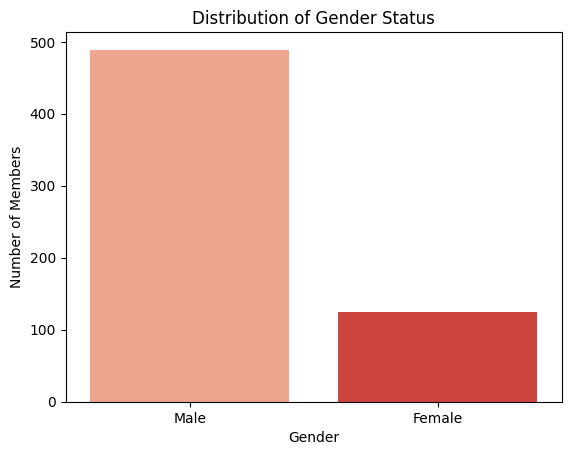

In [75]:
#count plot
sns.countplot(x = data['Gender'],palette='Reds')
plt.title("Distribution of Gender Status")
plt.xlabel('Gender')
plt.ylabel('Number of Members')

/tmp/ipykernel_7267/4059793595.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = data['Education'],palette='Greens')


Text(0, 0.5, 'Number of graduate')

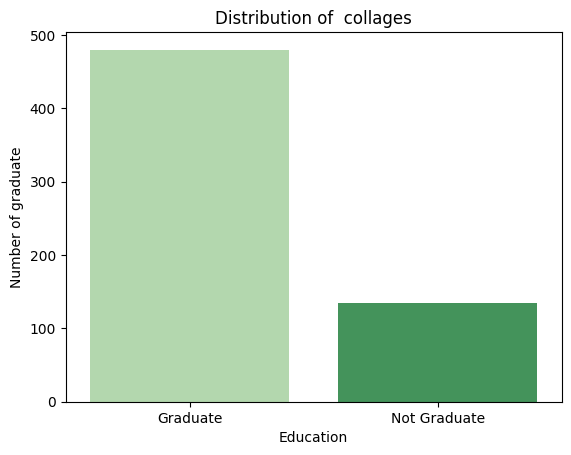

In [77]:
#count plot
sns.countplot(x = data['Education'],palette='Greens')
plt.title("Distribution of  collages")
plt.xlabel('Education')
plt.ylabel('Number of graduate')

Text(0, 0.5, 'Loan Amount')

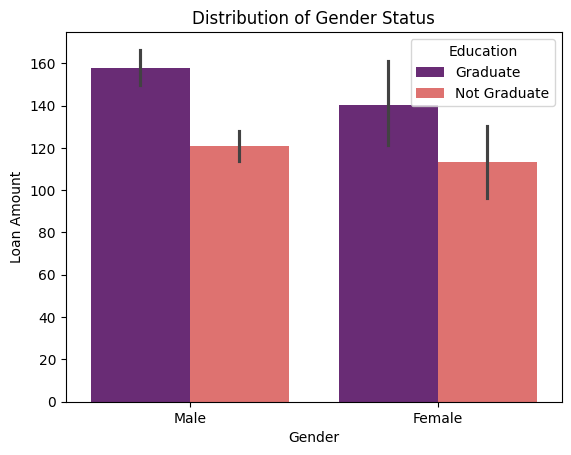

In [78]:
#bar plot 
import numpy
sns.barplot(x = 'Gender', y = 'LoanAmount', data = data,estimator=numpy.mean, palette='magma',
            hue='Education')
plt.title("Distribution of Gender Status")
plt.xlabel('Gender')
plt.ylabel('Loan Amount')

/home/user/.local/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 45.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Gender', ylabel='ApplicantIncome'>

/home/user/.local/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 61.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/user/.local/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 28.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


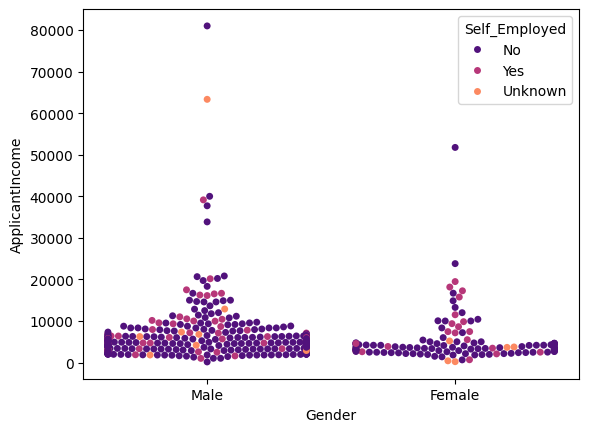

In [79]:
#swarm plot
sns.swarmplot(x ='Gender',y ='ApplicantIncome',data = data, palette='magma',
              hue = 'Self_Employed')